1. Some of these instruments are going to be polyphonic, so we need to find a way to flatten into a monophonic representation
2. Really having a hard time going through this directory. Kernel keeps crashing

Create taxonomy of instrument names in files -> do histogram
OR -> there are cleaned up versions of these!!! e.g. musenet version has mapped out intruments
https://github.com/asigalov61/LAKH-MuseNet-MIDI-Dataset/blob/main/LAKH_MuseNet_MIDI_Dataset_Maker.ipynb
Use family grouping for making combinations (see page behzad sent) -> e.g. piano, guitar, bass, percussion, or ethinic, percussion, bass, guitar... you get the idea

Move notebook stuff to actual scripts to run from terminal
Do data batches to keep from running out of memory

In [184]:
import os
import pretty_midi
import numpy as np
import pandas as pd
import lakh_midi
from tqdm import tqdm

import lakh_midi
import matplotlib.pyplot as plt

In [79]:
instrument_types_for_hist = []
for root, dirs, files in os.walk('lmd_subset_merged'):
    for file in files:
        pm_hist = pretty_midi.PrettyMIDI(os.path.join(root, file))
        for instrument in pm_hist.instruments:
            instrument_types_for_hist.append(instrument.name)
    

In [ ]:
midi_instrument_mapping = {
    "Piano": [0, 1, 2, 3, 4, 5, 6, 7],
    "Percussion": [8, 9, 10, 11, 12, 13, 14, 15],
    "Organ": [16, 17, 18, 19, 20, 21, 22, 23],
    "Guitar": [24, 25, 26, 27, 28, 29, 30, 31],
    "Bass": [32, 33, 34, 35, 36, 37, 38, 39],
    "Strings": [40, 41, 42, 43, 44, 45, 46, 47],
    "Ensemble": [48, 49, 50, 51, 52, 53, 54, 55],
    "Brass": [56, 57, 58, 59, 60, 61, 62, 63],
    "Reed": [64, 65, 66, 67, 68, 69, 70, 71],
    "Pipe": [72, 73, 74, 75, 76, 77, 78, 79],
    "Synth Lead": [80, 81, 82, 83, 84, 85, 86, 87],
    "Synth Pad": [88, 89, 90, 91, 92, 93, 94, 95],
    "Synth Effects": [96, 97, 98, 99, 100, 101, 102, 103],
    "Ethnic": [104, 105, 106, 107, 108, 109, 110, 111],
    "Percussive": [112, 113, 114, 115, 116, 117, 118, 119],
    "Sound Effects": [120, 121, 122, 123, 124, 125, 126, 127]
}

In [197]:
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

# Given instrument mapping keys
instrument_hist_list = ["Piano", "Percussion", "Guitar", "Bass", "Brass", "Ethnic", "Percussive", "Sound Effects", "Drums", "Synth Effects"]


# Get all combinations of 4 instrument families
combo_list = list(combinations(sorted(instrument_hist_list), 4))

# Count how many times each combo appears
# (Here, each combination appears once by construction — use real data for varying counts)
combo_counts = Counter()

# Convert to strings for labeling
labels = [' | '.join(combo) for combo in combo_counts.keys()]
counts = list(combo_counts.values())

# Plot histogram (will be large!)
#plt.figure(figsize=(15, 10))
#plt.barh(labels, counts)
#plt.xlabel('Count')
#plt.title('Histogram of 4-Instrument Family Combinations')
#plt.tight_layout()
#plt.show()


In [198]:
for root, dirs, files in os.walk('lmd_merged'):
    for file in files:
        print(file)
        inst_set = set()
        pm_hist = pretty_midi.PrettyMIDI(os.path.join(root, file))
        for instrument in pm_hist.instruments:
            inst_set.add(instrument.name)
        for combo in combo_list:
            if set(combo).issubset(inst_set):
                combo_counts[combo] += 1

print("Combo counts:")
for combo, count in combo_counts.items():
    print(f"{combo}: {count}")

8dd21ed71394635fb571a5ec6af448c2.mid
130c624c79e02f31e029379ccb81ccf4.mid
9fcfccf1c2245c74eb02fbd6ce70fbdf.mid
c8e13552fd4481022cff2725bd6277d0.mid
2995ff8e46c862ae3d2c8c60b9b6fab4.mid
216c04198cfb233fbaf0ea0942d9fa87.mid
1d7ff7f2b6b4001449960fc8529ba468.mid
5de335a499f104e4290eddd6facd60e6.mid
8cbb214fb39998ec363fa62196a0ea7b.mid
1e27e6332fd10069864df7131a9eca58.mid
096bc34fbe50e58c2ac36a1e8c2fc752.mid
03f3e2c02f0f61e8142fd1049bd6dd5d.mid
4ab7e5a160cee9f7a46fe1fd13d281bb.mid
13906497143f348fd4a1b673feb5b1aa.mid
aa9284c328fa8a83370c1be895cc927a.mid
f6485b6ac469b5a8018ad6881385c645.mid
2092a0c9c64ef0ff28d5fe84ea1685bb.mid
9d30679480d0e55a07be14144977cd71.mid
dcdb4105ef086784a470776d7c7771a9.mid
6d520a967c47e00934656912fe7d466a.mid
1b0a6681ff6dfc0550f75155a36b8431.mid
fd5fbe117968b2fe772cc5a8b0c3c4e2.mid
220f67d7f1c9a720c5d43836274fb22c.mid
18bdd7775d895e909851decf6d8e30e1.mid
80ea068d7bed7c2af7b36bd77cce5b3c.mid
6b783eb6edcca41b23dead59973c6126.mid
831b0a8ad031cce0ecdcf985e85afc04.mid
b

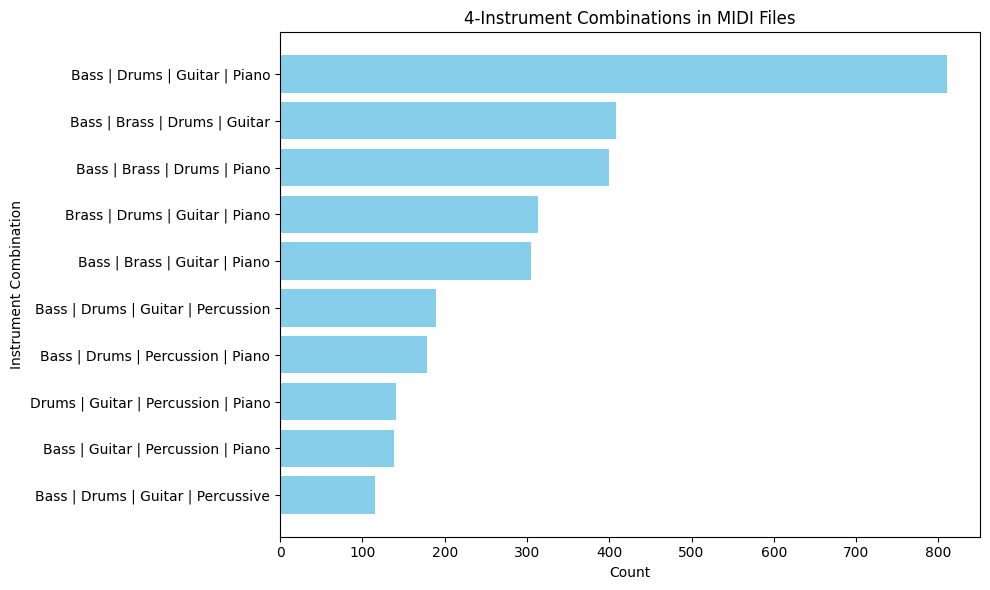

In [199]:
#most_common = combo_counts.most_common()

# Split into labels and values
labels = [' | '.join(combo) for combo, _ in combo_counts.most_common(10)]
values = [count for _, count in combo_counts.most_common(10)]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Count")
plt.ylabel("Instrument Combination")
plt.title("4-Instrument Combinations in MIDI Files")
plt.gca().invert_yaxis()  # So the highest bar is on top
plt.tight_layout()
plt.show()

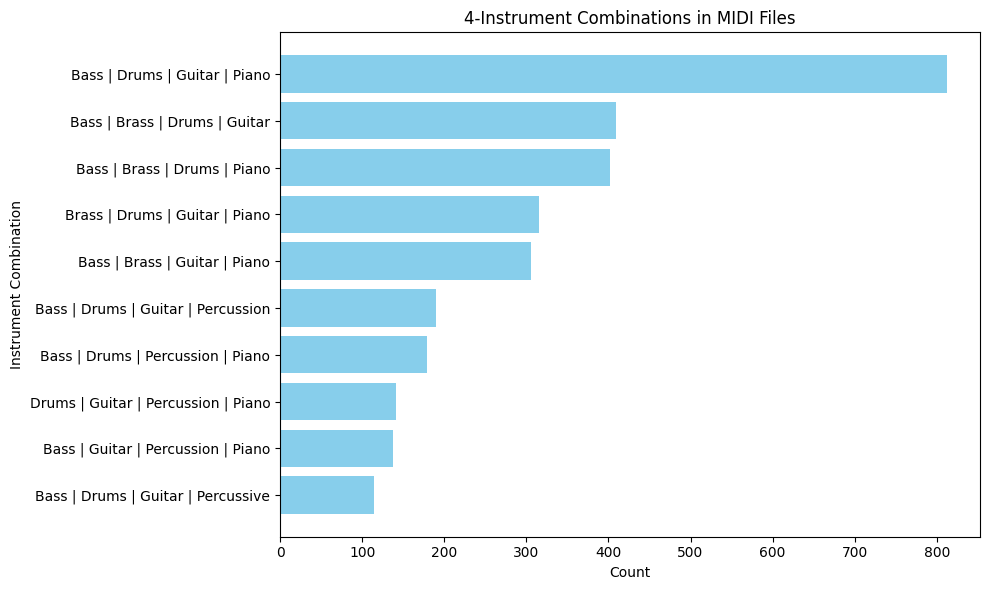

In [173]:
#most_common = combo_counts.most_common()

# Split into labels and values
labels = [' | '.join(combo) for combo, _ in combo_counts.most_common(10)]
values = [count for _, count in combo_counts.most_common(10)]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Count")
plt.ylabel("Instrument Combination")
plt.title("4-Instrument Combinations in MIDI Files")
plt.gca().invert_yaxis()  # So the highest bar is on top
plt.tight_layout()
plt.show()

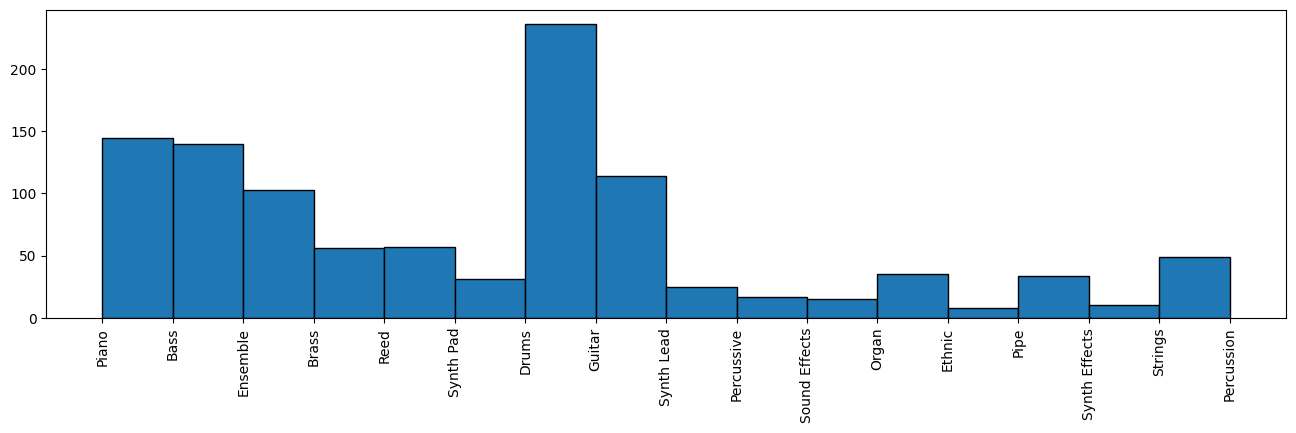

In [80]:
plt.figure(figsize=(16,4))
plt.hist(instrument_types_for_hist, edgecolor='black', bins=16)

plt.xticks(rotation=90)

plt.show()

In [81]:
print(instrument_types_for_hist.count('Piano'))

145


In [14]:
def plot_instrument_histogram_mini(directory):
        instrument_types_for_hist = []
        for root, dirs, files in os.walk(directory):
            for file in files[:300]:
                try:
                    pm_hist = pretty_midi.PrettyMIDI(os.path.join(root, file))
                    for instrument in pm_hist.instruments:
                        instrument_types_for_hist.append(instrument.name)
                except:
                    print(f"Error processing {file}")
        plt.hist(instrument_types_for_hist, edgecolor='black')
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
lakh_midi.create_merged_midi('lmd_full', 'lmd_merged_subset')

In [187]:
#This removes small intervals from the midi file, which can cause issues rewriting the midi file
def remove_small_intervals(midi):
    min_interval = 1
    intervals = []
    epsilon = 1e-3
    for instrument in midi.instruments:
        for note in instrument.notes:
            if note.end - note.start <= epsilon:
                print("error")
                instrument.notes.remove(note)
            else:
            # print("ok")
                #intervals.append(note.end - note.start)
                #min_interval = min(min_interval, note.end - note.start)
                pass

# Creates separate midi files for each instrument in the midi file
# The instrument names are hardcoded, so it only works for the Lakh MIDI dataset
# Inputs: midi_dir (directory containing the midi files),
#         midi_file (name of the midi file),
#         new_dir (directory to save the new midi files)
# Outputs: new midi files with the instrument names appended to the file name
# Example: if the input midi file is 'example.mid', the output files will be:
#          'example_piano.mid', 'example_guitar.mid', 'example_bass.mid', etc.
def create_separate_midi_tracks_lakh(midi_dir, new_dir):

    os.makedirs(new_dir, exist_ok=True)

    file_count = sum(len(files) for _, _, files in os.walk(midi_dir))  # Get the number of files

    with tqdm(total=file_count) as pbar:
        for root, dirs, files in os.walk(midi_dir):
            for midi_file in files:
                if midi_file.endswith('.mid'):
                    try:
                    
                        pm = pretty_midi.PrettyMIDI(midi_dir + '/' + midi_file)
                        tempo_times, tempi = pm.get_tempo_changes()
                        midi_file_name = midi_file.split('.mid')[0]
                        # Remove the small intervals from the midi file - these were causing errors
                        remove_small_intervals(pm)

                        # Set time signature for the midi files below
                        ts = pretty_midi.TimeSignature(numerator=4, denominator=4, time=0.0)
                        
                        
                        for instrument in pm.instruments:

                            if instrument.name == 'Piano':
                                instrument_piano = pretty_midi.PrettyMIDI(initial_tempo=tempi[0] if len(tempi) > 0 else 120.0)
                                instrument_piano.time_signature_changes.append(ts)
                                instrument_piano.instruments.append(instrument)
                                instrument_piano.write(new_dir + '/' + midi_file_name + '_piano.mid')
                                print(f"Writing {midi_file_name}_piano.mid")
                        
                            if instrument.name == 'Guitar':
                                instrument_guitar = pretty_midi.PrettyMIDI(initial_tempo=tempi[0] if len(tempi) > 0 else 120.0)
                                instrument_guitar.time_signature_changes.append(ts)
                                instrument_guitar.instruments.append(instrument)
                                instrument_guitar.write(new_dir + '/' + midi_file_name + '_guitar.mid')
                                print(f"Writing {midi_file_name}_guitar.mid")

                            if instrument.name == 'Bass':
                                instrument_bass = pretty_midi.PrettyMIDI(initial_tempo=tempi[0] if len(tempi) > 0 else 120.0)
                                instrument_bass.time_signature_changes.append(ts)
                                instrument_bass.instruments.append(instrument)
                                instrument_bass.write(new_dir + '/' + midi_file_name + '_bass.mid')
                                print(f"Writing {midi_file_name}_bass.mid")

                            if instrument.name == 'Drums':
                                instrument_drum = pretty_midi.PrettyMIDI(initial_tempo=tempi[0] if len(tempi) > 0 else 120.0)
                                instrument_drum.time_signature_changes.append(ts)
                                instrument_drum.instruments.append(instrument)
                                instrument_drum.write(new_dir + '/' + midi_file_name + '_drum.mid')
                                print(f"Writing {midi_file_name}_drum.mid")
                                

                            if instrument.name == 'Brass':
                                instrument_brass = pretty_midi.PrettyMIDI(initial_tempo=tempi[0] if len(tempi) > 0 else 120.0)
                                instrument_brass.time_signature_changes.append(ts)
                                instrument_brass.instruments.append(instrument)
                                instrument_brass.write(new_dir + '/' + midi_file_name + '_brass.mid')
                                print(f"Writing {midi_file_name}_brass.mid")

                            if instrument.name == 'Percussion':
                                instrument_sfx = pretty_midi.PrettyMIDI(initial_tempo=tempi[0] if len(tempi) > 0 else 120.0)
                                instrument_sfx.time_signature_changes.append(ts)
                                instrument_sfx.instruments.append(instrument)
                                instrument_sfx.write(new_dir + '/' + midi_file_name + '_percussion.mid')
                                print(f"Writing {midi_file_name}_percussion.mid")

                            if instrument.name == 'Percussive':
                                instrument_sfx = pretty_midi.PrettyMIDI(initial_tempo=tempi[0] if len(tempi) > 0 else 120.0)
                                instrument_sfx.time_signature_changes.append(ts)
                                instrument_sfx.instruments.append(instrument)
                                instrument_sfx.write(new_dir + '/' + midi_file_name + '_percussive.mid')
                                print(f"Writing {midi_file_name}_percussive.mid")

                    except:
                        print(f"Error processing file {midi_file}")
                        continue

In [188]:
create_separate_midi_tracks_lakh('lmd_merged', 'lmd_merged_separate_tracks')


  0%|          | 0/1850 [00:00<?, ?it/s]

Writing 8dd21ed71394635fb571a5ec6af448c2_piano.mid
Writing 8dd21ed71394635fb571a5ec6af448c2_bass.mid
Writing 8dd21ed71394635fb571a5ec6af448c2_brass.mid
Writing 8dd21ed71394635fb571a5ec6af448c2_drum.mid
Writing 130c624c79e02f31e029379ccb81ccf4_piano.mid
Writing 130c624c79e02f31e029379ccb81ccf4_guitar.mid
Writing 130c624c79e02f31e029379ccb81ccf4_drum.mid
Writing 9fcfccf1c2245c74eb02fbd6ce70fbdf_piano.mid
Writing 9fcfccf1c2245c74eb02fbd6ce70fbdf_bass.mid
Writing 9fcfccf1c2245c74eb02fbd6ce70fbdf_percussive.mid
Writing 9fcfccf1c2245c74eb02fbd6ce70fbdf_drum.mid
Writing c8e13552fd4481022cff2725bd6277d0_piano.mid
Writing c8e13552fd4481022cff2725bd6277d0_guitar.mid
Writing c8e13552fd4481022cff2725bd6277d0_bass.mid
Writing c8e13552fd4481022cff2725bd6277d0_drum.mid
Writing 2995ff8e46c862ae3d2c8c60b9b6fab4_piano.mid
Writing 2995ff8e46c862ae3d2c8c60b9b6fab4_guitar.mid
Writing 2995ff8e46c862ae3d2c8c60b9b6fab4_bass.mid
Writing 2995ff8e46c862ae3d2c8c60b9b6fab4_brass.mid
Writing 2995ff8e46c862ae3d2c8c6

  0%|          | 0/1850 [03:51<?, ?it/s]

Writing d98cd7cc62322856e296616890e99b24_piano.mid
Writing d06d52063e47a2ae62ba6af75f0cbe9d_piano.mid
Writing d06d52063e47a2ae62ba6af75f0cbe9d_guitar.mid
Writing d06d52063e47a2ae62ba6af75f0cbe9d_bass.mid
Writing d06d52063e47a2ae62ba6af75f0cbe9d_drum.mid


In [ ]:
# ----------------------------------------------------------------
# -----------           Load from Midi             --------------
# ----------------------------------------------------------------

#---------------------------------------------------------
#This is for loading the midi files into HVO Sequences
#---------------------------------------------------------

from hvo_sequence import midi_to_hvo_sequence

#Create Mapping for the MIDI values in the tracks. Since these are pitched, we make a mapping from [0, 127]
mapping_array = list(range(0,128))
PITCH_MAPPING = {
    'Instrument': mapping_array
}

# Create 4 HVO Sequences for each individual MIDI instrument file

def load_hvo_from_midi(mapping, midi_dir, midi_file):
    hs_individual_streams_list = []
    INSTRUMENT_LIST_1 = ['piano', 'guitar', 'bass', 'drum']#, 'brass', 'ethnic', 'sound_effects']
    max_length = 0
    #Load the four midi instrument files into HVO Sequences
    for i, instrument_in_list in enumerate(INSTRUMENT_LIST_1):
        hs_individual_streams_list.append(
            midi_to_hvo_sequence(
                filename= midi_dir + '/' + midi_file +  "_" + instrument_in_list + '.mid',
                drum_mapping=mapping,
                beat_division_factors=[4]))
        
        #Find the longest HVO Sequence
        max_length = max(max_length, hs_individual_streams_list[i].hvo.shape[0])

    #Adjust all HVO Sequences so they have the same length as the longest
    for i in range(4):
        hs_individual_streams_list[i].adjust_length(max_length)

    return hs_individual_streams_list

#Compile all four individual voice HVO sequences into a single HVO sequence
#Input: mapping (drum mapping), hs_individual_streams_list (list of four individual instrument streams)
#Output: HVO sequence with four instruments
from hvo_sequence import HVO_Sequence
def combine_individual_instrument_hvo_to_single_hvo(mapping, hs_individual_streams_list, midi_file):

    #We set each voice to a Midi Mapping value for Drums
    #Four_Voices = {
    #    "voice_1": [36],
    #    "voice_2": [37],
    #    "voice_3": [38],
    #    "voice_4": [39]
    #}
    midi = pretty_midi.PrettyMIDI(midi_file)
    tempo_times, tempi = midi.get_tempo_changes()
    
    #Create new HVO Sequence with beat division of 4 and set Drum Mapping to Four_Voices Mapping
    hvo_seq_all_voices = HVO_Sequence(
        beat_division_factors=[4],
        drum_mapping=mapping)

    #Add tempo of 120 BPM to the HVO sequence at time 0
    ### !!!!!!!!! Add the additional tempo changes here if needed !!!!!!!!!
    hvo_seq_all_voices.add_tempo(
        time_step=0,
        qpm=tempi[0] #changed from 120 for testing !!!!!
    )

    #Add a time signature of 4/4 for the HVO Sequence
    hvo_seq_all_voices.add_time_signature(
        time_step=0,
        numerator=4,
        denominator=4
    )

    #Adjust the length of the HVO Sequence to 
    hvo_seq_all_voices.adjust_length(hs_individual_streams_list[0].hvo.shape[0])

    #print (hvo_seq_all_voices.hvo.shape)

    for i in range(4):
        hvo_seq_all_voices.hvo[:, i] = hs_individual_streams_list[i].hvo[:, 0]
        hvo_seq_all_voices.hvo[:, i+4] = hs_individual_streams_list[i].hvo[:, 1]
        hvo_seq_all_voices.hvo[:, i+8] = hs_individual_streams_list[i].hvo[:, 2]

    return hvo_seq_all_voices


In [146]:
#Mapping for the MIDI values in the tracks. Since these are pitched, we make a mapping from [0, 127]
mapping_array = list(range(0,128))
PITCH_MAPPING = {
    'Instrument': mapping_array
}

In [175]:
hvo_four_voices_lakh_test_1 = load_hvo_from_midi(PITCH_MAPPING, 'lmd_merged_separate_tracks', 'ffeb0cfe6faf120e2568dd97b160d30b')
hvo_four_voices_lakh_test_2 = load_hvo_from_midi(PITCH_MAPPING, 'lmd_merged_separate_tracks', '1b3445e8ab76f61470295246b33b9b36')
hvo_four_voices_lakh_test_3 = load_hvo_from_midi(PITCH_MAPPING, 'lmd_merged_separate_tracks', 'bb5940dafdf1ca5fbff256ccf2e6eccd')
hvo_four_voices_lakh_test_4 = load_hvo_from_midi(PITCH_MAPPING, 'lmd_merged_separate_tracks', 'c679f8cd5e56b2f6df03cf41b1f4b89d')


In [54]:
# Four Voice Mapping for the HVO Sequence
FOUR_VOICES = {
        "voice_1": [36],
        "voice_2": [37],
        "voice_3": [38],
        "voice_4": [39]
    }

In [176]:
hvo_1_lakh = combine_individual_instrument_hvo_to_single_hvo(FOUR_VOICES, hvo_four_voices_lakh_test_1, 'lmd_merged_separate_tracks/ffeb0cfe6faf120e2568dd97b160d30b_bass.mid')
hvo_2_lakh = combine_individual_instrument_hvo_to_single_hvo(FOUR_VOICES, hvo_four_voices_lakh_test_2, 'lmd_merged_separate_tracks/1b3445e8ab76f61470295246b33b9b36_bass.mid')
hvo_3_lakh = combine_individual_instrument_hvo_to_single_hvo(FOUR_VOICES, hvo_four_voices_lakh_test_3, 'lmd_merged_separate_tracks/bb5940dafdf1ca5fbff256ccf2e6eccd_bass.mid')
hvo_4_lakh = combine_individual_instrument_hvo_to_single_hvo(FOUR_VOICES, hvo_four_voices_lakh_test_4, 'lmd_merged_separate_tracks/c679f8cd5e56b2f6df03cf41b1f4b89d_bass.mid')

In [ ]:
#---------------------------------------------------------
# Testing adding original tempo to new midi file
# pm_temp = pretty_midi.PrettyMIDI('lmd_full/2/2a0a7a74f4f9536c4c535fa22d5b78fd.mid')
# tempo_times, tempi = pm_temp.get_tempo_changes()
# time_sig = pm_temp.time_signature_changes

# print(tempo_times)
# print(tempi[0])
# print(time_sig)

# #from note_seq import midi_io

# #ns_temp = midi_io.midi_to_note_sequence(pm_temp)

# #ns_temp.tempos


# pm_merged_temp = pretty_midi.PrettyMIDI('lmd_subset_merged/97c1f795ffb676dfaa5a0202f341d44c.mid')
# print(pm_merged_temp.get_tempo_changes())
# print(pm_merged_temp.time_signature_changes)

# new_pm = pretty_midi.PrettyMIDI(initial_tempo=tempi[0])
# #new_pm.time_signature_changes = time_sig.copy()
# ts = pretty_midi.TimeSignature(numerator=4, denominator=4, time=0.0)
# new_pm.time_signature_changes.append(ts)
# print(new_pm.get_tempo_changes())
# print(new_pm.time_signature_changes)

(array([0.]), array([120.]))
[TimeSignature(numerator=4, denominator=4, time=0.0)]


In [153]:
from bokeh.io import output_notebook, show
output_notebook()
hvo_1_lakh.to_html_plot(
    filename="hvo_1_lakh.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p27675', ...)

In [177]:
from bokeh.io import output_notebook, show
output_notebook()
hvo_2_lakh.to_html_plot(
    filename="hvo_2_lakh.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p28434', ...)

In [178]:
from bokeh.io import output_notebook, show
output_notebook()
hvo_3_lakh.to_html_plot(
    filename="hvo_3_lakh.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p30487', ...)

In [179]:
from bokeh.io import output_notebook, show
output_notebook()
hvo_4_lakh.to_html_plot(
    filename="hvo_4_lakh.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p32353', ...)

In [129]:
from bokeh.io import output_notebook, show
output_notebook()
hs_temp.to_html_plot(
    filename="hvo_1_lakh.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p23648', ...)

In [64]:
#Gives Piano Roll Representation of HVO Sequence
from bokeh.io import output_notebook, show
output_notebook()
hvo_1_lakh.to_html_plot(
    filename="hvo_1_lakh.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p4914', ...)

In [73]:
hvo_four_voices_lakh_test_2 = load_hvo_from_midi(PITCH_MAPPING, 'lmd_separate_tracks', '0bf196b831b5eb794e1bdaf388b18f52')
hvo_lakh_2 = combine_individual_instrument_hvo_to_single_hvo(FOUR_VOICES, hvo_four_voices_lakh_test_2)


In [76]:
#Gives Piano Roll Representation of HVO Sequence
from bokeh.io import output_notebook, show
output_notebook()
hvo_lakh_2.to_html_plot(
    filename="hvo_lakh_2.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p11189', ...)

Below - Verified tempos and time sigs are correctly passed

In [143]:
pm_time_test_shit = pretty_midi.PrettyMIDI("lmd_merged_separate_tracks/f893833482e69e9293743be74769a475_piano.mid")
print(pm_time_test_shit.get_tempo_changes())
print(pm_time_test_shit.time_signature_changes)

(array([0.]), array([106.00238505]))
[TimeSignature(numerator=4, denominator=4, time=0.0)]


In [144]:
pm_time_test_shit_full = pretty_midi.PrettyMIDI("lmd_full/f/f893833482e69e9293743be74769a475.mid")
print(pm_time_test_shit_full.get_tempo_changes())
print(pm_time_test_shit_full.time_signature_changes)

(array([0.]), array([106.00238505]))
[TimeSignature(numerator=4, denominator=4, time=0.0)]
